In [1]:
!pip install keras matplotlib

In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [3]:
(x_train , y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model_3 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
model_3.compile(optimizer=SGD(learning_rate=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
result = model_3.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.3168 - loss: 1.9130 - val_accuracy: 0.3648 - val_loss: 1.7982
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3899 - loss: 1.7329 - val_accuracy: 0.3982 - val_loss: 1.6986
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4170 - loss: 1.6529 - val_accuracy: 0.4187 - val_loss: 1.6422
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4363 - loss: 1.5943 - val_accuracy: 0.4302 - val_loss: 1.5991
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4549 - loss: 1.5475 - val_accuracy: 0.4182 - val_loss: 1.6302
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4665 - loss: 1.5142 - val_accuracy: 0.4598 - val_loss: 1.5398
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4744 - loss: 1.4816 - val_accuracy: 0.4115 - val_loss: 1.6792
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4891 - loss: 1.4480 - v

In [8]:
(loss , accuracy) = model_3.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.02f}")
print(f"Test Accuracy: {accuracy*100:.02f}%")
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4700 - loss: 1.4746
Test Loss: 1.47
Test Accuracy: 47.00%
{'accuracy': [0.3168250024318695, 0.3899250030517578, 0.41702499985694885, 0.43627500534057617, 0.454925000667572, 0.4664500057697296, 0.47440001368522644, 0.48910000920295715, 0.499875009059906, 0.5114750266075134], 'loss': [1.9129884243011475, 1.7328764200210571, 1.6529228687286377, 1.5943362712860107, 1.5474765300750732, 1.514181137084961, 1.4815641641616821, 1.4479639530181885, 1.4181076288223267, 1.3951133489608765], 'val_accuracy': [0.36480000615119934, 0.39820000529289246, 0.4187000095844269, 0.4302000105381012, 0.41819998621940613, 0.45980000495910645, 0.4115000069141388, 0.461899995803833, 0.46810001134872437, 0.46799999475479126], 'val_loss': [1.798172116279602, 1.6986486911773682, 1.6422386169433594, 1.5990654230117798, 1.63020658493042, 1.539766788482666, 1.6792181730270386, 1.5191954374313354, 1.5063446760177612, 1.5026315450668335]}


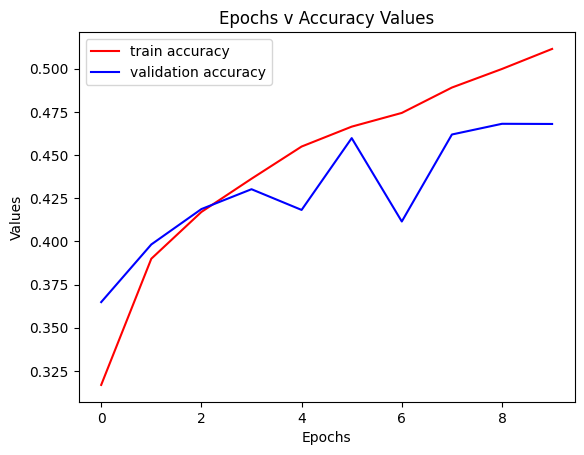

In [9]:
plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.title('Epochs v Accuracy Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()

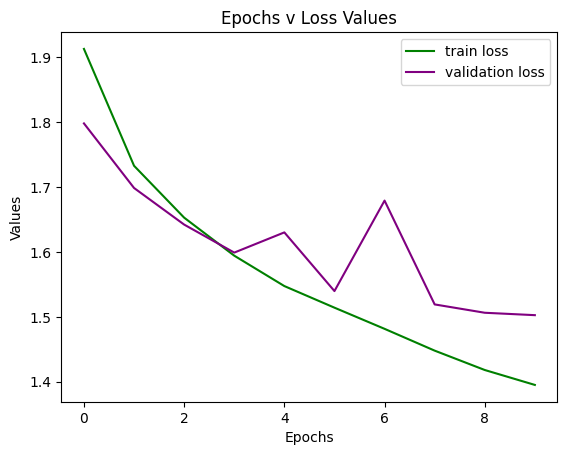

In [10]:
plt.plot(result.history['loss'], label='train loss', color='green')
plt.plot(result.history['val_loss'], label='validation loss', color='purple')
plt.title('Epochs v Loss Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()